In [1]:
from rmgpy.rmg.main import RMG
from IPython.display import display

In [2]:
inputFile = 'polycyclic_qm_inputs/input_total.py'

In [3]:
rmg = RMG()
rmg.loadThermoInput(inputFile)

In [4]:
def extractPolycyclicGroups(molecule):
    """
    Extract polycyclic functional groups from a real molecule
    """
    struct = molecule.copy(deep=True)
    # Saturate the structure if it is a radical
    if struct.isRadical():
        struct.saturate()
    struct.deleteHydrogens()
    
    polyRings = struct.getPolycyclicRings()
    groups = [convertCycleToGroup(ring) for ring in polyRings]
    
    return groups
                
def convertCycleToGroup(cycle):
    """
    This function converts a list of atoms in a cycle to a functional Group object
    """
    from rmgpy.molecule.group import GroupAtom, GroupBond, Group
    
    # Create GroupAtom object for each atom in the cycle, label the first one in the cycle with a *
    groupAtoms = {}
    bonds = []
    for atom in cycle:
        groupAtoms[atom] = GroupAtom(atomType=[atom.atomType],
                                     radicalElectrons=[0],
                                     label='*' if cycle.index(atom)==0 else '')
                
    group = Group(atoms=groupAtoms.values())            
    
    # Create GroupBond for each bond between atoms in the cycle, but not outside of the cycle
    for atom in cycle:
        for bondedAtom, bond in atom.edges.iteritems():
            if bondedAtom in cycle:
                # create a group bond with the same bond order as in the original molecule,
                # if it hasn't already been created
                if not group.hasBond(groupAtoms[atom],groupAtoms[bondedAtom]):
                    group.addBond(GroupBond(groupAtoms[atom],groupAtoms[bondedAtom],order=[bond.order]))
            else:
                pass
        
    group.update()
    
    return group

s1_3_3_ane
1 * Cs u0 {2,S} {5,S}
2   Cs u0 {1,S} {5,S}
3   Cs u0 {4,S} {5,S}
4   Cs u0 {3,S} {5,S}
5   Cs u0 {1,S} {2,S} {3,S} {4,S}

**********************


s1_3_3_ene
1 * Cd u0 {3,S} {5,D}
2   Cs u0 {3,S} {4,S}
3   Cs u0 {1,S} {2,S} {4,S} {5,S}
4   Cs u0 {2,S} {3,S}
5   Cd u0 {1,D} {3,S}

**********************


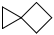

s1_3_4_ane
1 * Cs u0 {2,S} {6,S}
2   Cs u0 {1,S} {6,S}
3   Cs u0 {5,S} {6,S}
4   Cs u0 {5,S} {6,S}
5   Cs u0 {3,S} {4,S}
6   Cs u0 {1,S} {2,S} {3,S} {4,S}

**********************


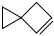

s1_3_4_ene
1 * Cd u0 {4,S} {6,D}
2   Cs u0 {3,S} {5,S}
3   Cs u0 {2,S} {4,S} {5,S} {6,S}
4   Cs u0 {1,S} {3,S}
5   Cs u0 {2,S} {3,S}
6   Cd u0 {1,D} {3,S}

**********************


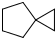

s1_3_5_ane
1 * Cs u0 {3,S} {5,S}
2   Cs u0 {3,S} {6,S}
3   Cs u0 {1,S} {2,S} {4,S} {6,S}
4   Cs u0 {3,S} {7,S}
5   Cs u0 {1,S} {7,S}
6   Cs u0 {2,S} {3,S}
7   Cs u0 {4,S} {5,S}

**********************


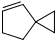

s1_3_5_ene_1
1 * Cs u0 {5,S} {6,S}
2   Cd u0 {3,D} {6,S}
3   Cd u0 {2,D} {5,S}
4   Cs u0 {5,S} {7,S}
5   Cs u0 {1,S} {3,S} {4,S} {7,S}
6   Cs u0 {1,S} {2,S}
7   Cs u0 {4,S} {5,S}

**********************


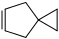

s1_3_5_ene_2
1 * Cs u0 {3,S} {5,S}
2   Cd u0 {6,S} {7,D}
3   Cs u0 {1,S} {4,S} {5,S} {6,S}
4   Cs u0 {3,S} {7,S}
5   Cs u0 {1,S} {3,S}
6   Cs u0 {2,S} {3,S}
7   Cd u0 {2,D} {4,S}

**********************


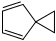

s1_3_5_diene_1_3
1 * Cs u0 {2,S} {6,S}
2   Cs u0 {1,S} {6,S}
3   Cd u0 {4,D} {6,S}
4   Cd u0 {3,D} {5,S}
5   Cd u0 {4,S} {7,D}
6   Cs u0 {1,S} {2,S} {3,S} {7,S}
7   Cd u0 {5,D} {6,S}

**********************


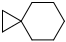

s1_3_6_ane
1 * Cs u0 {2,S} {3,S} {6,S} {8,S}
2   Cs u0 {1,S} {3,S}
3   Cs u0 {1,S} {2,S}
4   Cs u0 {6,S} {7,S}
5   Cs u0 {7,S} {8,S}
6   Cs u0 {1,S} {4,S}
7   Cs u0 {4,S} {5,S}
8   Cs u0 {1,S} {5,S}

**********************


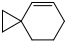

s1_3_6_ene_1
1 * Cs u0 {4,S} {7,S}
2   Cd u0 {7,S} {8,D}
3   Cs u0 {5,S} {6,S}
4   Cs u0 {1,S} {6,S}
5   Cs u0 {3,S} {6,S}
6   Cs u0 {3,S} {4,S} {5,S} {8,S}
7   Cs u0 {1,S} {2,S}
8   Cd u0 {2,D} {6,S}

**********************


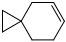

s1_3_6_ene_2
1 * Cs u0 {7,S} {8,S}
2   Cs u0 {3,S} {5,S}
3   Cd u0 {2,S} {6,D}
4   Cs u0 {6,S} {8,S}
5   Cs u0 {2,S} {8,S}
6   Cd u0 {3,D} {4,S}
7   Cs u0 {1,S} {8,S}
8   Cs u0 {1,S} {4,S} {5,S} {7,S}

**********************


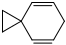

s1_3_6_diene_1_4
1   Cd u0 {4,D} {6,S}
2   Cd u0 {3,D} {5,S}
3   Cd u0 {2,D} {6,S}
4   Cd u0 {1,D} {5,S}
5   Cs u0 {2,S} {4,S}
6   Cs u0 {1,S} {3,S} {7,S} {8,S}
7 * Cs u0 {6,S} {8,S}
8   Cs u0 {6,S} {7,S}

**********************


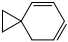

s1_3_6_diene_1_3
1 * Cd u0 {3,S} {4,D}
2   Cd u0 {7,S} {8,D}
3   Cs u0 {1,S} {7,S}
4   Cd u0 {1,D} {8,S}
5   Cs u0 {6,S} {7,S}
6   Cs u0 {5,S} {7,S}
7   Cs u0 {2,S} {3,S} {5,S} {6,S}
8   Cd u0 {2,D} {4,S}

**********************


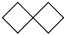

s1_4_4_ane
1 * Cs u0 {2,S} {4,S}
2   Cs u0 {1,S} {7,S}
3   Cs u0 {4,S} {5,S}
4   Cs u0 {1,S} {3,S} {6,S} {7,S}
5   Cs u0 {3,S} {6,S}
6   Cs u0 {4,S} {5,S}
7   Cs u0 {2,S} {4,S}

**********************


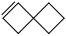

s1_4_4_ene_1
1 * Cs u0 {2,S} {3,S} {4,S} {5,S}
2   Cs u0 {1,S} {6,S}
3   Cs u0 {1,S} {6,S}
4   Cs u0 {1,S} {7,S}
5   Cd u0 {1,S} {7,D}
6   Cs u0 {2,S} {3,S}
7   Cd u0 {4,S} {5,D}

**********************


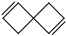

s1_4_4_diene_1_5
1 * Cs u0 {2,S} {6,S}
2   Cd u0 {1,S} {5,D}
3   Cd u0 {4,S} {7,D}
4   Cs u0 {3,S} {6,S}
5   Cd u0 {2,D} {6,S}
6   Cs u0 {1,S} {4,S} {5,S} {7,S}
7   Cd u0 {3,D} {6,S}

**********************


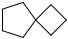

s1_4_5_ane
1 * Cs u0 {5,S} {8,S}
2   Cs u0 {3,S} {4,S}
3   Cs u0 {2,S} {7,S}
4   Cs u0 {2,S} {5,S}
5   Cs u0 {1,S} {4,S} {6,S} {7,S}
6   Cs u0 {5,S} {8,S}
7   Cs u0 {3,S} {5,S}
8   Cs u0 {1,S} {6,S}

**********************


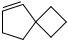

s1_4_5_ene_1
1 * Cs u0 {3,S} {4,S}
2   Cs u0 {5,S} {6,S}
3   Cs u0 {1,S} {5,S} {6,S} {7,S}
4   Cs u0 {1,S} {8,S}
5   Cs u0 {2,S} {3,S}
6   Cs u0 {2,S} {3,S}
7   Cd u0 {3,S} {8,D}
8   Cd u0 {4,S} {7,D}

**********************


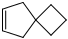

s1_4_5_ene_2
1 * Cs u0 {4,S} {8,S}
2   Cs u0 {7,S} {8,S}
3   Cs u0 {6,S} {8,S}
4   Cd u0 {1,S} {7,D}
5   Cs u0 {6,S} {8,S}
6   Cs u0 {3,S} {5,S}
7   Cd u0 {2,S} {4,D}
8   Cs u0 {1,S} {2,S} {3,S} {5,S}

**********************


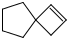

s1_4_5_ene_6
1 * Cd u0 {4,S} {8,D}
2   Cs u0 {3,S} {5,S}
3   Cs u0 {2,S} {7,S}
4   Cs u0 {1,S} {5,S}
5   Cs u0 {2,S} {4,S} {6,S} {8,S}
6   Cs u0 {5,S} {7,S}
7   Cs u0 {3,S} {6,S}
8   Cd u0 {1,D} {5,S}

**********************


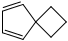

s1_4_5_diene_1_3
1 * Cd u0 {3,D} {5,S}
2   Cs u0 {3,S} {4,S} {7,S} {8,S}
3   Cd u0 {1,D} {2,S}
4   Cs u0 {2,S} {6,S}
5   Cd u0 {1,S} {7,D}
6   Cs u0 {4,S} {8,S}
7   Cd u0 {2,S} {5,D}
8   Cs u0 {2,S} {6,S}

**********************


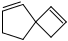

s1_4_5_diene_1_6
1 * Cd u0 {3,S} {5,D}
2   Cs u0 {5,S} {6,S} {7,S} {8,S}
3   Cs u0 {1,S} {8,S}
4   Cd u0 {6,D} {7,S}
5   Cd u0 {1,D} {2,S}
6   Cd u0 {2,S} {4,D}
7   Cs u0 {2,S} {4,S}
8   Cs u0 {2,S} {3,S}

**********************


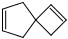

s1_4_5_diene_2_6
1 * Cd u0 {5,S} {6,D}
2   Cs u0 {3,S} {5,S} {6,S} {7,S}
3   Cs u0 {2,S} {4,S}
4   Cd u0 {3,S} {8,D}
5   Cs u0 {1,S} {2,S}
6   Cd u0 {1,D} {2,S}
7   Cs u0 {2,S} {8,S}
8   Cd u0 {4,D} {7,S}

**********************


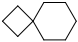

s1_4_6_ane
1 * Cs u0 {3,S} {7,S}
2   Cs u0 {4,S} {5,S}
3   Cs u0 {1,S} {9,S}
4   Cs u0 {2,S} {6,S} {8,S} {9,S}
5   Cs u0 {2,S} {8,S}
6   Cs u0 {4,S} {7,S}
7   Cs u0 {1,S} {6,S}
8   Cs u0 {4,S} {5,S}
9   Cs u0 {3,S} {4,S}

**********************


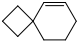

s1_4_6_ene_1
1 * Cd u0 {7,D} {8,S}
2   Cs u0 {3,S} {8,S}
3   Cs u0 {2,S} {9,S}
4   Cs u0 {5,S} {6,S}
5   Cs u0 {4,S} {8,S}
6   Cs u0 {4,S} {7,S}
7   Cd u0 {1,D} {6,S}
8   Cs u0 {1,S} {2,S} {5,S} {9,S}
9   Cs u0 {3,S} {8,S}

**********************


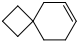

s1_4_6_ene_2
1 * Cs u0 {8,S} {9,S}
2   Cs u0 {4,S} {8,S}
3   Cd u0 {6,S} {9,D}
4   Cs u0 {2,S} {7,S}
5   Cs u0 {6,S} {8,S}
6   Cs u0 {3,S} {5,S}
7   Cs u0 {4,S} {8,S}
8   Cs u0 {1,S} {2,S} {5,S} {7,S}
9   Cd u0 {1,S} {3,D}

**********************


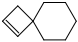

s1_4_6_ene_7
1 * Cs u0 {5,S} {9,S}
2   Cd u0 {5,D} {9,S}
3   Cs u0 {6,S} {8,S}
4   Cs u0 {7,S} {9,S}
5   Cd u0 {1,S} {2,D}
6   Cs u0 {3,S} {9,S}
7   Cs u0 {4,S} {8,S}
8   Cs u0 {3,S} {7,S}
9   Cs u0 {1,S} {2,S} {4,S} {6,S}

**********************


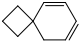

s1_4_6_diene_1_3
1 * Cs u0 {2,S} {3,S} {5,S} {7,S}
2   Cd u0 {1,S} {6,D}
3   Cs u0 {1,S} {8,S}
4   Cd u0 {5,S} {9,D}
5   Cs u0 {1,S} {4,S}
6   Cd u0 {2,D} {9,S}
7   Cs u0 {1,S} {8,S}
8   Cs u0 {3,S} {7,S}
9   Cd u0 {4,D} {6,S}

**********************


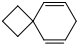

s1_4_6_diene_1_4
1 * Cs u0 {8,S} {9,S}
2   Cd u0 {3,D} {7,S}
3   Cd u0 {2,D} {9,S}
4   Cd u0 {6,D} {7,S}
5   Cs u0 {8,S} {9,S}
6   Cd u0 {4,D} {9,S}
7   Cs u0 {2,S} {4,S}
8   Cs u0 {1,S} {5,S}
9   Cs u0 {1,S} {3,S} {5,S} {6,S}

**********************


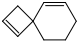

s1_4_6_diene_1_7
1 * Cd u0 {2,D} {7,S}
2   Cd u0 {1,D} {5,S}
3   Cd u0 {7,S} {9,D}
4   Cs u0 {6,S} {7,S}
5   Cs u0 {2,S} {7,S}
6   Cs u0 {4,S} {8,S}
7   Cs u0 {1,S} {3,S} {4,S} {5,S}
8   Cs u0 {6,S} {9,S}
9   Cd u0 {3,D} {8,S}

**********************


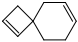

s1_4_6_diene_2_7
1 * Cd u0 {4,D} {8,S}
2   Cs u0 {7,S} {9,S}
3   Cs u0 {5,S} {6,S}
4   Cd u0 {1,D} {6,S}
5   Cd u0 {3,S} {7,D}
6   Cs u0 {3,S} {4,S} {8,S} {9,S}
7   Cd u0 {2,S} {5,D}
8   Cs u0 {1,S} {6,S}
9   Cs u0 {2,S} {6,S}

**********************


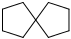

s1_5_5_ane
1 * Cs u0 {4,S} {9,S}
2   Cs u0 {4,S} {8,S}
3   Cs u0 {7,S} {9,S}
4   Cs u0 {1,S} {2,S} {6,S} {7,S}
5   Cs u0 {6,S} {8,S}
6   Cs u0 {4,S} {5,S}
7   Cs u0 {3,S} {4,S}
8   Cs u0 {2,S} {5,S}
9   Cs u0 {1,S} {3,S}

**********************


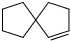

s1_5_5_ene_1
1 * Cs u0 {2,S} {9,S}
2   Cs u0 {1,S} {8,S}
3   Cd u0 {4,S} {6,D}
4   Cs u0 {3,S} {7,S}
5   Cs u0 {6,S} {7,S} {8,S} {9,S}
6   Cd u0 {3,D} {5,S}
7   Cs u0 {4,S} {5,S}
8   Cs u0 {2,S} {5,S}
9   Cs u0 {1,S} {5,S}

**********************


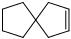

s1_5_5_ene_2
1 * Cs u0 {5,S} {6,S} {7,S} {9,S}
2   Cs u0 {4,S} {9,S}
3   Cd u0 {6,S} {8,D}
4   Cs u0 {2,S} {7,S}
5   Cs u0 {1,S} {8,S}
6   Cs u0 {1,S} {3,S}
7   Cs u0 {1,S} {4,S}
8   Cd u0 {3,D} {5,S}
9   Cs u0 {1,S} {2,S}

**********************


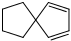

s1_5_5_diene_1_3
1 * Cs u0 {2,S} {3,S}
2   Cs u0 {1,S} {9,S}
3   Cs u0 {1,S} {5,S} {7,S} {8,S}
4   Cd u0 {6,S} {8,D}
5   Cs u0 {3,S} {9,S}
6   Cd u0 {4,S} {7,D}
7   Cd u0 {3,S} {6,D}
8   Cd u0 {3,S} {4,D}
9   Cs u0 {2,S} {5,S}

**********************


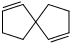

s1_5_5_diene_1_6
1 * Cs u0 {3,S} {5,S}
2   Cs u0 {4,S} {9,S}
3   Cs u0 {1,S} {4,S}
4   Cs u0 {2,S} {3,S} {7,S} {8,S}
5   Cd u0 {1,S} {7,D}
6   Cd u0 {8,D} {9,S}
7   Cd u0 {4,S} {5,D}
8   Cd u0 {4,S} {6,D}
9   Cs u0 {2,S} {6,S}

**********************


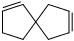

s1_5_5_diene_1_7
1 * Cs u0 {3,S} {6,S}
2   Cd u0 {3,D} {5,S}
3   Cd u0 {1,S} {2,D}
4   Cd u0 {7,S} {9,D}
5   Cs u0 {2,S} {6,S}
6   Cs u0 {1,S} {5,S} {8,S} {9,S}
7   Cs u0 {4,S} {8,S}
8   Cs u0 {6,S} {7,S}
9   Cd u0 {4,D} {6,S}

**********************


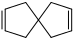

s1_5_5_diene_2_7
1 * Cd u0 {7,S} {9,D}
2   Cd u0 {4,D} {5,S}
3   Cs u0 {6,S} {9,S}
4   Cd u0 {2,D} {8,S}
5   Cs u0 {2,S} {6,S}
6   Cs u0 {3,S} {5,S} {7,S} {8,S}
7   Cs u0 {1,S} {6,S}
8   Cs u0 {4,S} {6,S}
9   Cd u0 {1,D} {3,S}

**********************


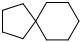

s1_5_6_ane
1  * Cs u0 {7,S} {9,S}
2    Cs u0 {4,S} {5,S}
3    Cs u0 {6,S} {10,S}
4    Cs u0 {2,S} {6,S} {8,S} {9,S}
5    Cs u0 {2,S} {10,S}
6    Cs u0 {3,S} {4,S}
7    Cs u0 {1,S} {8,S}
8    Cs u0 {4,S} {7,S}
9    Cs u0 {1,S} {4,S}
10   Cs u0 {3,S} {5,S}

**********************


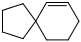

s1_5_6_ene_1
1  * Cs u0 {5,S} {9,S}
2    Cs u0 {3,S} {5,S} {6,S} {8,S}
3    Cs u0 {2,S} {9,S}
4    Cd u0 {6,D} {7,S}
5    Cs u0 {1,S} {2,S}
6    Cd u0 {2,S} {4,D}
7    Cs u0 {4,S} {10,S}
8    Cs u0 {2,S} {10,S}
9    Cs u0 {1,S} {3,S}
10   Cs u0 {7,S} {8,S}

**********************


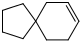

s1_5_6_ene_2
1    Cs u0 {5,S} {8,S}
2  * Cs u0 {5,S} {9,S}
3    Cs u0 {5,S} {6,S}
4    Cs u0 {5,S} {7,S}
5    Cs u0 {1,S} {2,S} {3,S} {4,S}
6    Cd u0 {3,S} {10,D}
7    Cs u0 {4,S} {9,S}
8    Cs u0 {1,S} {10,S}
9    Cs u0 {2,S} {7,S}
10   Cd u0 {6,D} {8,S}

**********************


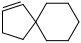

s1_5_6_ene_7
1  * Cd u0 {4,D} {5,S}
2    Cs u0 {3,S} {10,S}
3    Cs u0 {2,S} {5,S}
4    Cd u0 {1,D} {8,S}
5    Cs u0 {1,S} {3,S} {6,S} {9,S}
6    Cs u0 {5,S} {8,S}
7    Cs u0 {9,S} {10,S}
8    Cs u0 {4,S} {6,S}
9    Cs u0 {5,S} {7,S}
10   Cs u0 {2,S} {7,S}

**********************


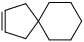

s1_5_6_ene_8
1  * Cs u0 {7,S} {10,S}
2    Cs u0 {3,S} {5,S}
3    Cs u0 {2,S} {10,S}
4    Cs u0 {8,S} {10,S}
5    Cs u0 {2,S} {7,S}
6    Cd u0 {8,D} {9,S}
7    Cs u0 {1,S} {5,S}
8    Cd u0 {4,S} {6,D}
9    Cs u0 {6,S} {10,S}
10   Cs u0 {1,S} {3,S} {4,S} {9,S}

**********************


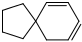

s1_5_6_diene_1_3
1  * Cd u0 {6,S} {10,D}
2    Cs u0 {8,S} {9,S}
3    Cs u0 {5,S} {6,S}
4    Cd u0 {5,D} {10,S}
5    Cd u0 {3,S} {4,D}
6    Cs u0 {1,S} {3,S} {7,S} {9,S}
7    Cs u0 {6,S} {8,S}
8    Cs u0 {2,S} {7,S}
9    Cs u0 {2,S} {6,S}
10   Cd u0 {1,D} {4,S}

**********************


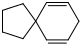

s1_5_6_diene_1_4
1  * Cd u0 {7,S} {8,D}
2    Cd u0 {9,D} {10,S}
3    Cs u0 {4,S} {7,S}
4    Cs u0 {3,S} {6,S}
5    Cs u0 {6,S} {7,S}
6    Cs u0 {4,S} {5,S}
7    Cs u0 {1,S} {3,S} {5,S} {9,S}
8    Cd u0 {1,D} {10,S}
9    Cd u0 {2,D} {7,S}
10   Cs u0 {2,S} {8,S}

**********************


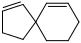

s1_5_6_diene_1_7
1  * Cd u0 {7,D} {9,S}
2    Cs u0 {8,S} {9,S}
3    Cs u0 {8,S} {10,S}
4    Cd u0 {5,D} {6,S}
5    Cd u0 {4,D} {8,S}
6    Cs u0 {4,S} {10,S}
7    Cd u0 {1,D} {8,S}
8    Cs u0 {2,S} {3,S} {5,S} {7,S}
9    Cs u0 {1,S} {2,S}
10   Cs u0 {3,S} {6,S}

**********************


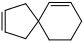

s1_5_6_diene_1_8
1  * Cd u0 {2,S} {4,D}
2    Cs u0 {1,S} {7,S}
3    Cs u0 {6,S} {10,S}
4    Cd u0 {1,D} {6,S}
5    Cd u0 {9,S} {10,D}
6    Cs u0 {3,S} {4,S} {8,S} {9,S}
7    Cs u0 {2,S} {8,S}
8    Cs u0 {6,S} {7,S}
9    Cs u0 {5,S} {6,S}
10   Cd u0 {3,S} {5,D}

**********************


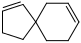

s1_5_6_diene_2_7
1  * Cs u0 {2,S} {3,S} {4,S} {5,S}
2    Cs u0 {1,S} {10,S}
3    Cd u0 {1,S} {7,D}
4    Cs u0 {1,S} {9,S}
5    Cs u0 {1,S} {6,S}
6    Cd u0 {5,S} {8,D}
7    Cd u0 {3,D} {9,S}
8    Cd u0 {6,D} {10,S}
9    Cs u0 {4,S} {7,S}
10   Cs u0 {2,S} {8,S}

**********************


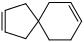

s1_5_6_diene_2_8
1  * Cs u0 {2,S} {4,S}
2    Cd u0 {1,S} {8,D}
3    Cd u0 {9,S} {10,D}
4    Cs u0 {1,S} {5,S} {7,S} {9,S}
5    Cs u0 {4,S} {6,S}
6    Cs u0 {5,S} {10,S}
7    Cs u0 {4,S} {8,S}
8    Cd u0 {2,D} {7,S}
9    Cs u0 {3,S} {4,S}
10   Cd u0 {3,D} {6,S}

**********************


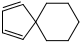

s1_5_6_diene_7_9
1  * Cs u0 {8,S} {9,S}
2    Cs u0 {5,S} {6,S} {7,S} {8,S}
3    Cd u0 {4,S} {6,D}
4    Cd u0 {3,S} {7,D}
5    Cs u0 {2,S} {10,S}
6    Cd u0 {2,S} {3,D}
7    Cd u0 {2,S} {4,D}
8    Cs u0 {1,S} {2,S}
9    Cs u0 {1,S} {10,S}
10   Cs u0 {5,S} {9,S}

**********************


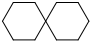

s1_6_6_ane
1  * Cs u0 {2,S} {9,S}
2    Cs u0 {1,S} {4,S} {5,S} {6,S}
3    Cs u0 {8,S} {10,S}
4    Cs u0 {2,S} {11,S}
5    Cs u0 {2,S} {10,S}
6    Cs u0 {2,S} {8,S}
7    Cs u0 {9,S} {11,S}
8    Cs u0 {3,S} {6,S}
9    Cs u0 {1,S} {7,S}
10   Cs u0 {3,S} {5,S}
11   Cs u0 {4,S} {7,S}

**********************


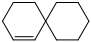

s1_6_6_ene_1
1  * Cs u0 {2,S} {8,S}
2    Cs u0 {1,S} {5,S}
3    Cs u0 {5,S} {9,S}
4    Cd u0 {8,S} {10,D}
5    Cs u0 {2,S} {3,S}
6    Cs u0 {7,S} {11,S}
7    Cs u0 {6,S} {8,S}
8    Cs u0 {1,S} {4,S} {7,S} {9,S}
9    Cs u0 {3,S} {8,S}
10   Cd u0 {4,D} {11,S}
11   Cs u0 {6,S} {10,S}

**********************


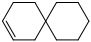

s1_6_6_ene_2
1  * Cs u0 {4,S} {5,S}
2    Cs u0 {10,S} {11,S}
3    Cs u0 {4,S} {7,S} {9,S} {11,S}
4    Cs u0 {1,S} {3,S}
5    Cd u0 {1,S} {8,D}
6    Cs u0 {7,S} {10,S}
7    Cs u0 {3,S} {6,S}
8    Cd u0 {5,D} {9,S}
9    Cs u0 {3,S} {8,S}
10   Cs u0 {2,S} {6,S}
11   Cs u0 {2,S} {3,S}

**********************


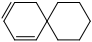

s1_6_6_diene_1_3
1  * Cd u0 {9,S} {10,D}
2    Cd u0 {6,D} {11,S}
3    Cs u0 {7,S} {8,S}
4    Cs u0 {5,S} {7,S}
5    Cs u0 {4,S} {11,S}
6    Cd u0 {2,D} {10,S}
7    Cs u0 {3,S} {4,S}
8    Cs u0 {3,S} {11,S}
9    Cs u0 {1,S} {11,S}
10   Cd u0 {1,D} {6,S}
11   Cs u0 {2,S} {5,S} {8,S} {9,S}

**********************


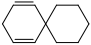

s1_6_6_diene_1_4
1  * Cd u0 {5,S} {6,D}
2    Cs u0 {4,S} {7,S}
3    Cs u0 {6,S} {10,S}
4    Cs u0 {2,S} {5,S}
5    Cs u0 {1,S} {4,S} {8,S} {9,S}
6    Cd u0 {1,D} {3,S}
7    Cs u0 {2,S} {11,S}
8    Cs u0 {5,S} {11,S}
9    Cd u0 {5,S} {10,D}
10   Cd u0 {3,S} {9,D}
11   Cs u0 {7,S} {8,S}

**********************


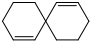

s1_6_6_diene_1_7
1  * Cs u0 {3,S} {6,S}
2    Cd u0 {10,S} {11,D}
3    Cs u0 {1,S} {10,S}
4    Cd u0 {6,S} {9,D}
5    Cs u0 {8,S} {9,S}
6    Cs u0 {1,S} {4,S} {7,S} {11,S}
7    Cs u0 {6,S} {8,S}
8    Cs u0 {5,S} {7,S}
9    Cd u0 {4,D} {5,S}
10   Cs u0 {2,S} {3,S}
11   Cd u0 {2,D} {6,S}

**********************


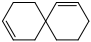

s1_6_6_diene_1_8
1  * Cs u0 {6,S} {11,S}
2    Cs u0 {5,S} {7,S} {10,S} {11,S}
3    Cd u0 {6,S} {10,D}
4    Cs u0 {7,S} {8,S}
5    Cs u0 {2,S} {9,S}
6    Cs u0 {1,S} {3,S}
7    Cs u0 {2,S} {4,S}
8    Cd u0 {4,S} {9,D}
9    Cd u0 {5,S} {8,D}
10   Cd u0 {2,S} {3,D}
11   Cs u0 {1,S} {2,S}

**********************


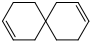

s1_6_6_diene_2_8
1  * Cd u0 {7,D} {9,S}
2    Cd u0 {3,D} {4,S}
3    Cd u0 {2,D} {6,S}
4    Cs u0 {2,S} {10,S}
5    Cs u0 {6,S} {9,S} {10,S} {11,S}
6    Cs u0 {3,S} {5,S}
7    Cd u0 {1,D} {8,S}
8    Cs u0 {7,S} {11,S}
9    Cs u0 {1,S} {5,S}
10   Cs u0 {4,S} {5,S}
11   Cs u0 {5,S} {8,S}

**********************


s2_3_3_ane
1 * Cs u0 {2,S} {3,S} {4,S}
2   Cs u0 {1,S} {3,S} {4,S}
3   Cs u0 {1,S} {2,S}
4   Cs u0 {1,S} {2,S}

**********************


s2_3_3_ene
1 * Cd u0 {2,S} {3,D} {4,S}
2   Cs u0 {1,S} {4,S}
3   Cd u0 {1,D} {4,S}
4   Cs u0 {1,S} {2,S} {3,S}

**********************


s2_3_4_ane
1 * Cs u0 {2,S} {3,S}
2   Cs u0 {1,S} {3,S} {5,S}
3   Cs u0 {1,S} {2,S} {4,S}
4   Cs u0 {3,S} {5,S}
5   Cs u0 {2,S} {4,S}

**********************


s2_3_4_ene_1
1 * Cs u0 {2,S} {3,S} {4,S}
2   Cs u0 {1,S} {4,S}
3   Cd u0 {1,S} {5,D}
4   Cs u0 {1,S} {2,S} {5,S}
5   Cd u0 {3,D} {4,S}

**********************


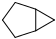

s2_3_5_ane
1 * Cs u0 {2,S} {5,S}
2   Cs u0 {1,S} {5,S} {6,S}
3   Cs u0 {4,S} {5,S}
4   Cs u0 {3,S} {6,S}
5   Cs u0 {1,S} {2,S} {3,S}
6   Cs u0 {2,S} {4,S}

**********************


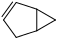

s2_3_5_ene_1
1 * Cs u0 {3,S} {4,S} {5,S}
2   Cd u0 {5,D} {6,S}
3   Cs u0 {1,S} {4,S}
4   Cs u0 {1,S} {3,S} {6,S}
5   Cd u0 {1,S} {2,D}
6   Cs u0 {2,S} {4,S}

**********************


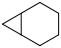

s2_3_6_ane
1 * Cs u0 {4,S} {6,S}
2   Cs u0 {5,S} {6,S} {7,S}
3   Cs u0 {4,S} {7,S}
4   Cs u0 {1,S} {3,S}
5   Cs u0 {2,S} {7,S}
6   Cs u0 {1,S} {2,S}
7   Cs u0 {2,S} {3,S} {5,S}

**********************


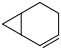

s2_3_6_ene_1
1 * Cs u0 {2,S} {4,S} {7,S}
2   Cs u0 {1,S} {4,S} {5,S}
3   Cd u0 {6,S} {7,D}
4   Cs u0 {1,S} {2,S}
5   Cs u0 {2,S} {6,S}
6   Cs u0 {3,S} {5,S}
7   Cd u0 {1,S} {3,D}

**********************


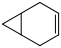

s2_3_6_ene_2
1 * Cs u0 {2,S} {7,S}
2   Cd u0 {1,S} {6,D}
3   Cs u0 {4,S} {7,S}
4   Cs u0 {3,S} {5,S} {7,S}
5   Cs u0 {4,S} {6,S}
6   Cd u0 {2,D} {5,S}
7   Cs u0 {1,S} {3,S} {4,S}

**********************


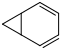

s2_3_6_diene_1_3
1 * Cd u0 {5,D} {6,S}
2   Cs u0 {3,S} {4,S} {5,S}
3   Cs u0 {2,S} {4,S} {7,S}
4   Cs u0 {2,S} {3,S}
5   Cd u0 {1,D} {2,S}
6   Cd u0 {1,S} {7,D}
7   Cd u0 {3,S} {6,D}

**********************


s2_4_4_ane
1 * Cs u0 {3,S} {4,S} {5,S}
2   Cs u0 {3,S} {5,S}
3   Cs u0 {1,S} {2,S} {6,S}
4   Cs u0 {1,S} {6,S}
5   Cs u0 {1,S} {2,S}
6   Cs u0 {3,S} {4,S}

**********************


s2_4_4_ene_1
1 * Cs u0 {2,S} {3,S} {5,S}
2   Cs u0 {1,S} {4,S} {6,S}
3   Cs u0 {1,S} {4,S}
4   Cs u0 {2,S} {3,S}
5   Cd u0 {1,S} {6,D}
6   Cd u0 {2,S} {5,D}

**********************


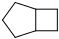

s2_4_5_ane
1 * Cs u0 {3,S} {4,S}
2   Cs u0 {6,S} {7,S}
3   Cs u0 {1,S} {5,S} {7,S}
4   Cs u0 {1,S} {7,S}
5   Cs u0 {3,S} {6,S}
6   Cs u0 {2,S} {5,S}
7   Cs u0 {2,S} {3,S} {4,S}

**********************


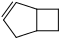

s2_4_5_ene_1
1 * Cd u0 {3,D} {4,S}
2   Cs u0 {6,S} {7,S}
3   Cd u0 {1,D} {5,S}
4   Cs u0 {1,S} {7,S}
5   Cs u0 {3,S} {6,S} {7,S}
6   Cs u0 {2,S} {5,S}
7   Cs u0 {2,S} {4,S} {5,S}

**********************


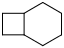

s2_4_6_ane
1 * Cs u0 {5,S} {8,S}
2   Cs u0 {5,S} {7,S} {8,S}
3   Cs u0 {4,S} {6,S}
4   Cs u0 {3,S} {5,S}
5   Cs u0 {1,S} {2,S} {4,S}
6   Cs u0 {3,S} {7,S}
7   Cs u0 {2,S} {6,S}
8   Cs u0 {1,S} {2,S}

**********************


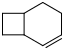

s2_4_6_ene_1
1 * Cs u0 {5,S} {7,S}
2   Cd u0 {5,S} {8,D}
3   Cs u0 {4,S} {6,S}
4   Cs u0 {3,S} {7,S} {8,S}
5   Cs u0 {1,S} {2,S}
6   Cs u0 {3,S} {7,S}
7   Cs u0 {1,S} {4,S} {6,S}
8   Cd u0 {2,D} {4,S}

**********************


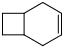

s2_4_6_ene_2
1 * Cs u0 {2,S} {4,S}
2   Cs u0 {1,S} {7,S} {8,S}
3   Cd u0 {4,D} {6,S}
4   Cd u0 {1,S} {3,D}
5   Cs u0 {7,S} {8,S}
6   Cs u0 {3,S} {7,S}
7   Cs u0 {2,S} {5,S} {6,S}
8   Cs u0 {2,S} {5,S}

**********************


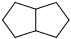

s2_5_5_ane
1 * Cs u0 {4,S} {8,S}
2   Cs u0 {4,S} {7,S}
3   Cs u0 {4,S} {5,S} {6,S}
4   Cs u0 {1,S} {2,S} {3,S}
5   Cs u0 {3,S} {8,S}
6   Cs u0 {3,S} {7,S}
7   Cs u0 {2,S} {6,S}
8   Cs u0 {1,S} {5,S}

**********************


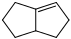

s2_5_5_ene_0
1 * Cs u0 {3,S} {4,S}
2   Cs u0 {5,S} {6,S}
3   Cs u0 {1,S} {6,S} {7,S}
4   Cs u0 {1,S} {8,S}
5   Cs u0 {2,S} {7,S}
6   Cd u0 {2,S} {3,S} {8,D}
7   Cs u0 {3,S} {5,S}
8   Cd u0 {4,S} {6,D}

**********************


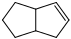

s2_5_5_ene_1
1 * Cd u0 {4,S} {7,D}
2   Cs u0 {5,S} {7,S}
3   Cs u0 {5,S} {8,S}
4   Cs u0 {1,S} {5,S} {6,S}
5   Cs u0 {2,S} {3,S} {4,S}
6   Cs u0 {4,S} {8,S}
7   Cd u0 {1,D} {2,S}
8   Cs u0 {3,S} {6,S}

**********************


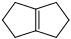

s2_5_5_ene_m
1   Cd u0 {3,S} {5,S} {6,D}
2 * Cs u0 {6,S} {7,S}
3   Cs u0 {1,S} {7,S}
4   Cs u0 {5,S} {8,S}
5   Cs u0 {1,S} {4,S}
6   Cd u0 {1,D} {2,S} {8,S}
7   Cs u0 {2,S} {3,S}
8   Cs u0 {4,S} {6,S}

**********************


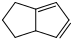

s2_5_5_diene_0_2
1 * Cs u0 {5,S} {6,S}
2   Cd u0 {4,D} {6,S} {8,S}
3   Cd u0 {4,S} {7,D}
4   Cd u0 {2,D} {3,S}
5   Cs u0 {1,S} {8,S}
6   Cs u0 {1,S} {2,S}
7   Cd u0 {3,D} {8,S}
8   Cs u0 {2,S} {5,S} {7,S}

**********************


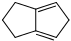

s2_5_5_diene_0_3
1 * Cd u0 {3,S} {4,D} {8,S}
2   Cs u0 {4,S} {5,S}
3   Cd u0 {1,S} {5,D} {6,S}
4   Cd u0 {1,D} {2,S}
5   Cd u0 {2,S} {3,D}
6   Cs u0 {3,S} {7,S}
7   Cs u0 {6,S} {8,S}
8   Cs u0 {1,S} {7,S}

**********************


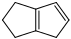

s2_5_5_diene_m_2
1 * Cs u0 {7,S} {8,S}
2   Cd u0 {4,D} {6,S}
3   Cd u0 {5,D} {6,S} {7,S}
4   Cd u0 {2,D} {5,S}
5   Cd u0 {3,D} {4,S} {8,S}
6   Cs u0 {2,S} {3,S}
7   Cs u0 {1,S} {3,S}
8   Cs u0 {1,S} {5,S}

**********************


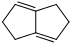

s2_5_5_diene_0_4
1 * Cd u0 {4,S} {5,D} {7,S}
2   Cs u0 {5,S} {6,S}
3   Cd u0 {4,D} {8,S}
4   Cd u0 {1,S} {3,D} {6,S}
5   Cd u0 {1,D} {2,S}
6   Cs u0 {2,S} {4,S}
7   Cs u0 {1,S} {8,S}
8   Cs u0 {3,S} {7,S}

**********************


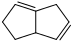

s2_5_5_diene_0_5
1 * Cd u0 {2,S} {7,D}
2   Cs u0 {1,S} {6,S} {8,S}
3   Cs u0 {5,S} {8,S}
4   Cs u0 {6,S} {7,S}
5   Cd u0 {3,S} {6,D}
6   Cd u0 {2,S} {4,S} {5,D}
7   Cd u0 {1,D} {4,S}
8   Cs u0 {2,S} {3,S}

**********************


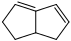

s2_5_5_diene_0_6
1 * Cs u0 {2,S} {3,S} {6,S}
2   Cd u0 {1,S} {5,S} {8,D}
3   Cs u0 {1,S} {4,S}
4   Cd u0 {3,S} {5,D}
5   Cd u0 {2,S} {4,D}
6   Cs u0 {1,S} {7,S}
7   Cs u0 {6,S} {8,S}
8   Cd u0 {2,D} {7,S}

**********************


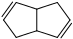

s2_5_5_diene_1_5
1 * Cd u0 {5,S} {7,D}
2   Cs u0 {3,S} {7,S}
3   Cs u0 {2,S} {5,S} {6,S}
4   Cd u0 {6,D} {8,S}
5   Cs u0 {1,S} {3,S} {8,S}
6   Cd u0 {3,S} {4,D}
7   Cd u0 {1,D} {2,S}
8   Cs u0 {4,S} {5,S}

**********************


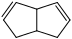

s2_5_5_diene_1_6
1 * Cd u0 {2,D} {5,S}
2   Cd u0 {1,D} {8,S}
3   Cs u0 {4,S} {7,S}
4   Cs u0 {3,S} {5,S} {8,S}
5   Cs u0 {1,S} {4,S} {6,S}
6   Cd u0 {5,S} {7,D}
7   Cd u0 {3,S} {6,D}
8   Cs u0 {2,S} {4,S}

**********************


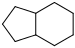

s2_5_6_ane
1 * Cs u0 {4,S} {6,S}
2   Cs u0 {3,S} {8,S}
3   Cs u0 {2,S} {9,S}
4   Cs u0 {1,S} {7,S} {8,S}
5   Cs u0 {6,S} {8,S}
6   Cs u0 {1,S} {5,S}
7   Cs u0 {4,S} {9,S}
8   Cs u0 {2,S} {4,S} {5,S}
9   Cs u0 {3,S} {7,S}

**********************


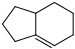

s2_5_6_ene_0
1 * Cs u0 {2,S} {4,S}
2   Cs u0 {1,S} {9,S}
3   Cs u0 {5,S} {8,S}
4   Cs u0 {1,S} {6,S} {8,S}
5   Cs u0 {3,S} {7,S}
6   Cd u0 {4,S} {7,D} {9,S}
7   Cd u0 {5,S} {6,D}
8   Cs u0 {3,S} {4,S}
9   Cs u0 {2,S} {6,S}

**********************


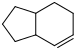

s2_5_6_ene_1
1 * Cd u0 {2,S} {5,D}
2   Cs u0 {1,S} {6,S} {9,S}
3   Cs u0 {4,S} {9,S}
4   Cs u0 {3,S} {6,S}
5   Cd u0 {1,D} {8,S}
6   Cs u0 {2,S} {4,S} {7,S}
7   Cs u0 {6,S} {8,S}
8   Cs u0 {5,S} {7,S}
9   Cs u0 {2,S} {3,S}

**********************


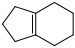

s2_5_6_ene_m
1 * Cs u0 {4,S} {5,S}
2   Cs u0 {4,S} {7,S}
3   Cs u0 {5,S} {8,S}
4   Cd u0 {1,S} {2,S} {9,D}
5   Cs u0 {1,S} {3,S}
6   Cs u0 {7,S} {9,S}
7   Cs u0 {2,S} {6,S}
8   Cs u0 {3,S} {9,S}
9   Cd u0 {4,D} {6,S} {8,S}

**********************


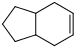

s2_5_6_ene_2
1 * Cs u0 {3,S} {6,S}
2   Cs u0 {5,S} {8,S}
3   Cs u0 {1,S} {5,S} {7,S}
4   Cs u0 {5,S} {9,S}
5   Cs u0 {2,S} {3,S} {4,S}
6   Cd u0 {1,S} {9,D}
7   Cs u0 {3,S} {8,S}
8   Cs u0 {2,S} {7,S}
9   Cd u0 {4,S} {6,D}

**********************


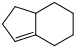

s2_5_6_ene_5
1 * Cs u0 {6,S} {8,S}
2   Cs u0 {3,S} {7,S}
3   Cs u0 {2,S} {4,S}
4   Cs u0 {3,S} {9,S}
5   Cs u0 {6,S} {7,S} {9,S}
6   Cs u0 {1,S} {5,S}
7   Cd u0 {2,S} {5,S} {8,D}
8   Cd u0 {1,S} {7,D}
9   Cs u0 {4,S} {5,S}

**********************


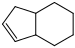

s2_5_6_ene_6
1 * Cd u0 {3,S} {8,D}
2   Cs u0 {5,S} {6,S}
3   Cs u0 {1,S} {4,S} {9,S}
4   Cs u0 {3,S} {5,S}
5   Cs u0 {2,S} {4,S}
6   Cs u0 {2,S} {9,S}
7   Cs u0 {8,S} {9,S}
8   Cd u0 {1,D} {7,S}
9   Cs u0 {3,S} {6,S} {7,S}

**********************


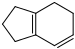

s2_5_6_diene_m_1
1 * Cs u0 {2,S} {8,S}
2   Cs u0 {1,S} {9,S}
3   Cs u0 {4,S} {7,S}
4   Cs u0 {3,S} {5,S}
5   Cd u0 {4,S} {8,D} {9,S}
6   Cd u0 {7,D} {8,S}
7   Cd u0 {3,S} {6,D}
8   Cd u0 {1,S} {5,D} {6,S}
9   Cs u0 {2,S} {5,S}

**********************


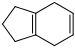

s2_5_6_diene_m_2
1 * Cs u0 {5,S} {7,S}
2   Cd u0 {3,S} {6,D}
3   Cs u0 {2,S} {4,S}
4   Cd u0 {3,S} {5,D} {8,S}
5   Cd u0 {1,S} {4,D} {9,S}
6   Cd u0 {2,D} {9,S}
7   Cs u0 {1,S} {8,S}
8   Cs u0 {4,S} {7,S}
9   Cs u0 {5,S} {6,S}

**********************


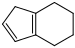

s2_5_6_diene_m_7
1 * Cs u0 {4,S} {7,S}
2   Cd u0 {5,D} {6,S} {7,S}
3   Cd u0 {6,S} {9,D}
4   Cs u0 {1,S} {8,S}
5   Cd u0 {2,D} {8,S} {9,S}
6   Cs u0 {2,S} {3,S}
7   Cs u0 {1,S} {2,S}
8   Cs u0 {4,S} {5,S}
9   Cd u0 {3,D} {5,S}

**********************


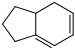

s2_5_6_diene_0_2
1 * Cd u0 {6,S} {7,D} {9,S}
2   Cs u0 {4,S} {9,S}
3   Cd u0 {5,S} {8,D}
4   Cs u0 {2,S} {6,S}
5   Cs u0 {3,S} {6,S}
6   Cs u0 {1,S} {4,S} {5,S}
7   Cd u0 {1,D} {8,S}
8   Cd u0 {3,D} {7,S}
9   Cs u0 {1,S} {2,S}

**********************


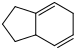

s2_5_6_diene_0_3
1 * Cs u0 {2,S} {4,S}
2   Cs u0 {1,S} {7,S}
3   Cs u0 {8,S} {9,S}
4   Cs u0 {1,S} {5,S} {6,S}
5   Cd u0 {4,S} {7,S} {9,D}
6   Cd u0 {4,S} {8,D}
7   Cs u0 {2,S} {5,S}
8   Cd u0 {3,S} {6,D}
9   Cd u0 {3,S} {5,D}

**********************


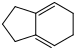

s2_5_6_diene_0_4
1 * Cd u0 {5,D} {6,S} {7,S}
2   Cs u0 {5,S} {9,S}
3   Cd u0 {7,D} {9,S}
4   Cs u0 {6,S} {8,S}
5   Cd u0 {1,D} {2,S}
6   Cs u0 {1,S} {4,S}
7   Cd u0 {1,S} {3,D} {8,S}
8   Cs u0 {4,S} {7,S}
9   Cs u0 {2,S} {3,S}

**********************


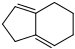

s2_5_6_diene_0_5
1 * Cs u0 {6,S} {8,S}
2   Cs u0 {3,S} {5,S}
3   Cs u0 {2,S} {7,S}
4   Cd u0 {7,S} {8,D} {9,S}
5   Cd u0 {2,S} {9,D}
6   Cs u0 {1,S} {9,S}
7   Cs u0 {3,S} {4,S}
8   Cd u0 {1,S} {4,D}
9   Cd u0 {4,S} {5,D} {6,S}

**********************


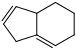

s2_5_6_diene_0_6
1 * Cs u0 {3,S} {7,S}
2   Cs u0 {3,S} {9,S}
3   Cs u0 {1,S} {2,S}
4   Cs u0 {5,S} {6,S}
5   Cd u0 {4,S} {7,D} {9,S}
6   Cd u0 {4,S} {8,D}
7   Cd u0 {1,S} {5,D}
8   Cd u0 {6,D} {9,S}
9   Cs u0 {2,S} {5,S} {8,S}

**********************


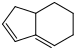

s2_5_6_diene_0_7
1 * Cd u0 {2,S} {3,D} {4,S}
2   Cs u0 {1,S} {5,S} {6,S}
3   Cd u0 {1,D} {8,S}
4   Cd u0 {1,S} {7,D}
5   Cs u0 {2,S} {9,S}
6   Cs u0 {2,S} {7,S}
7   Cd u0 {4,D} {6,S}
8   Cs u0 {3,S} {9,S}
9   Cs u0 {5,S} {8,S}

**********************


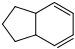

s2_5_6_diene_1_3
1 * Cs u0 {5,S} {6,S} {7,S}
2   Cd u0 {4,D} {7,S}
3   Cs u0 {7,S} {9,S}
4   Cd u0 {2,D} {8,S}
5   Cs u0 {1,S} {9,S}
6   Cd u0 {1,S} {8,D}
7   Cs u0 {1,S} {2,S} {3,S}
8   Cd u0 {4,S} {6,D}
9   Cs u0 {3,S} {5,S}

**********************


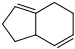

s2_5_6_diene_1_5
1 * Cs u0 {4,S} {6,S}
2   Cd u0 {5,D} {6,S} {9,S}
3   Cs u0 {8,S} {9,S}
4   Cs u0 {1,S} {5,S}
5   Cd u0 {2,D} {4,S}
6   Cs u0 {1,S} {2,S} {7,S}
7   Cd u0 {6,S} {8,D}
8   Cd u0 {3,S} {7,D}
9   Cs u0 {2,S} {3,S}

**********************


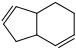

s2_5_6_diene_1_6
1 * Cs u0 {2,S} {5,S}
2   Cs u0 {1,S} {7,S} {9,S}
3   Cd u0 {7,D} {8,S}
4   Cd u0 {6,D} {9,S}
5   Cs u0 {1,S} {6,S}
6   Cd u0 {4,D} {5,S}
7   Cd u0 {2,S} {3,D}
8   Cs u0 {3,S} {9,S}
9   Cs u0 {2,S} {4,S} {8,S}

**********************


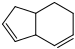

s2_5_6_diene_1_7
1 * Cd u0 {2,S} {7,D}
2   Cs u0 {1,S} {4,S}
3   Cs u0 {5,S} {9,S}
4   Cs u0 {2,S} {5,S}
5   Cs u0 {3,S} {4,S} {6,S}
6   Cs u0 {5,S} {7,S} {8,S}
7   Cd u0 {1,D} {6,S}
8   Cd u0 {6,S} {9,D}
9   Cd u0 {3,S} {8,D}

**********************


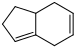

s2_5_6_diene_2_5
1 * Cs u0 {3,S} {5,S}
2   Cs u0 {3,S} {6,S} {7,S}
3   Cd u0 {1,S} {2,S} {8,D}
4   Cs u0 {7,S} {8,S}
5   Cd u0 {1,S} {9,D}
6   Cs u0 {2,S} {9,S}
7   Cs u0 {2,S} {4,S}
8   Cd u0 {3,D} {4,S}
9   Cd u0 {5,D} {6,S}

**********************


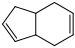

s2_5_6_diene_2_6
1 * Cd u0 {2,D} {3,S}
2   Cd u0 {1,D} {4,S}
3   Cs u0 {1,S} {5,S}
4   Cs u0 {2,S} {5,S} {7,S}
5   Cs u0 {3,S} {4,S} {8,S}
6   Cd u0 {8,S} {9,D}
7   Cs u0 {4,S} {9,S}
8   Cs u0 {5,S} {6,S}
9   Cd u0 {6,D} {7,S}

**********************


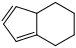

s2_5_6_diene_5_7
1 * Cs u0 {5,S} {6,S}
2   Cd u0 {3,D} {9,S}
3   Cd u0 {2,D} {6,S} {8,S}
4   Cs u0 {5,S} {8,S}
5   Cs u0 {1,S} {4,S}
6   Cs u0 {1,S} {3,S}
7   Cd u0 {8,S} {9,D}
8   Cs u0 {3,S} {4,S} {7,S}
9   Cd u0 {2,S} {7,D}

**********************


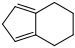

s2_5_6_diene_5_8
1 * Cs u0 {3,S} {8,S}
2   Cd u0 {5,S} {8,D}
3   Cs u0 {1,S} {4,S}
4   Cs u0 {3,S} {6,S}
5   Cs u0 {2,S} {7,S}
6   Cs u0 {4,S} {9,S}
7   Cd u0 {5,S} {9,D}
8   Cd u0 {1,S} {2,D} {9,S}
9   Cd u0 {6,S} {7,D} {8,S}

**********************


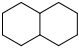

s2_6_6_ane
1  * Cs u0 {2,S} {4,S}
2    Cs u0 {1,S} {5,S} {10,S}
3    Cs u0 {5,S} {8,S}
4    Cs u0 {1,S} {8,S}
5    Cs u0 {2,S} {3,S} {6,S}
6    Cs u0 {5,S} {7,S}
7    Cs u0 {6,S} {9,S}
8    Cs u0 {3,S} {4,S}
9    Cs u0 {7,S} {10,S}
10   Cs u0 {2,S} {9,S}

**********************


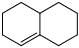

s2_6_6_ene_0
1    Cs u0 {6,S} {9,S} {10,S}
2    Cs u0 {4,S} {8,S}
3    Cs u0 {5,S} {10,S}
4    Cs u0 {2,S} {6,S}
5    Cs u0 {3,S} {7,S}
6    Cs u0 {1,S} {4,S}
7    Cs u0 {5,S} {9,S}
8  * Cd u0 {2,S} {10,D}
9    Cs u0 {1,S} {7,S}
10   Cd u0 {1,S} {3,S} {8,D}

**********************


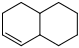

s2_6_6_ene_1
1  * Cs u0 {9,S} {10,S}
2    Cd u0 {4,S} {9,D}
3    Cs u0 {4,S} {5,S}
4    Cs u0 {2,S} {3,S} {6,S}
5    Cs u0 {3,S} {8,S}
6    Cs u0 {4,S} {7,S} {10,S}
7    Cs u0 {6,S} {8,S}
8    Cs u0 {5,S} {7,S}
9    Cd u0 {1,S} {2,D}
10   Cs u0 {1,S} {6,S}

**********************


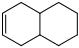

s2_6_6_ene_2
1    Cs u0 {6,S} {10,S}
2    Cs u0 {3,S} {10,S}
3    Cs u0 {2,S} {8,S}
4  * Cd u0 {5,D} {7,S}
5    Cd u0 {4,D} {9,S}
6    Cs u0 {1,S} {7,S} {8,S}
7    Cs u0 {4,S} {6,S}
8    Cs u0 {3,S} {6,S} {9,S}
9    Cs u0 {5,S} {8,S}
10   Cs u0 {1,S} {2,S}

**********************


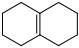

s2_6_6_ene_m
1  * Cs u0 {3,S} {10,S}
2    Cs u0 {5,S} {8,S}
3    Cd u0 {1,S} {4,S} {8,D}
4    Cs u0 {3,S} {7,S}
5    Cs u0 {2,S} {7,S}
6    Cs u0 {9,S} {10,S}
7    Cs u0 {4,S} {5,S}
8    Cd u0 {2,S} {3,D} {9,S}
9    Cs u0 {6,S} {8,S}
10   Cs u0 {1,S} {6,S}

**********************


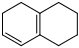

s2_6_6_diene_m_1
1  * Cs u0 {2,S} {3,S}
2    Cs u0 {1,S} {4,S}
3    Cs u0 {1,S} {6,S}
4    Cd u0 {2,S} {7,S} {10,D}
5    Cs u0 {8,S} {9,S}
6    Cs u0 {3,S} {10,S}
7    Cd u0 {4,S} {9,D}
8    Cs u0 {5,S} {10,S}
9    Cd u0 {5,S} {7,D}
10   Cd u0 {4,D} {6,S} {8,S}

**********************


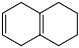

s2_6_6_diene_m_2
1  * Cd u0 {2,D} {3,S} {9,S}
2    Cd u0 {1,D} {8,S} {10,S}
3    Cs u0 {1,S} {4,S}
4    Cs u0 {3,S} {6,S}
5    Cd u0 {7,D} {9,S}
6    Cs u0 {4,S} {10,S}
7    Cd u0 {5,D} {8,S}
8    Cs u0 {2,S} {7,S}
9    Cs u0 {1,S} {5,S}
10   Cs u0 {2,S} {6,S}

**********************


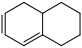

s2_6_6_diene_0_2
1  * Cd u0 {6,S} {8,D}
2    Cd u0 {3,S} {5,S} {6,D}
3    Cs u0 {2,S} {7,S} {10,S}
4    Cs u0 {7,S} {9,S}
5    Cs u0 {2,S} {9,S}
6    Cd u0 {1,S} {2,D}
7    Cs u0 {3,S} {4,S}
8    Cd u0 {1,D} {10,S}
9    Cs u0 {4,S} {5,S}
10   Cs u0 {3,S} {8,S}

**********************


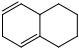

s2_6_6_diene_0_3
1  * Cs u0 {3,S} {4,S}
2    Cs u0 {3,S} {5,S}
3    Cs u0 {1,S} {2,S}
4    Cs u0 {1,S} {8,S}
5    Cd u0 {2,S} {7,D} {8,S}
6    Cd u0 {8,S} {9,D}
7    Cd u0 {5,D} {10,S}
8    Cs u0 {4,S} {5,S} {6,S}
9    Cd u0 {6,D} {10,S}
10   Cs u0 {7,S} {9,S}

**********************


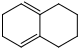

s2_6_6_diene_0_4
1  * Cs u0 {2,S} {8,S}
2    Cd u0 {1,S} {7,D}
3    Cs u0 {6,S} {10,S}
4    Cs u0 {6,S} {7,S}
5    Cd u0 {8,S} {9,D}
6    Cs u0 {3,S} {4,S}
7    Cd u0 {2,D} {4,S} {9,S}
8    Cs u0 {1,S} {5,S}
9    Cd u0 {5,D} {7,S} {10,S}
10   Cs u0 {3,S} {9,S}

**********************


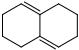

s2_6_6_diene_0_5
1  * Cs u0 {3,S} {7,S}
2    Cs u0 {5,S} {10,S}
3    Cs u0 {1,S} {8,S}
4    Cd u0 {5,S} {6,D} {8,S}
5    Cs u0 {2,S} {4,S}
6    Cd u0 {4,D} {7,S}
7    Cs u0 {1,S} {6,S}
8    Cd u0 {3,S} {4,S} {9,D}
9    Cd u0 {8,D} {10,S}
10   Cs u0 {2,S} {9,S}

**********************


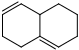

s2_6_6_diene_0_6
1  * Cs u0 {4,S} {5,S}
2    Cs u0 {6,S} {9,S}
3    Cs u0 {5,S} {7,S} {8,S}
4    Cs u0 {1,S} {10,S}
5    Cd u0 {1,S} {3,S} {6,D}
6    Cd u0 {2,S} {5,D}
7    Cd u0 {3,S} {10,D}
8    Cs u0 {3,S} {9,S}
9    Cs u0 {2,S} {8,S}
10   Cd u0 {4,S} {7,D}

**********************


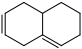

s2_6_6_diene_0_7
1  * Cs u0 {5,S} {10,S}
2    Cs u0 {3,S} {9,S}
3    Cd u0 {2,S} {4,D} {10,S}
4    Cd u0 {3,D} {8,S}
5    Cd u0 {1,S} {9,D}
6    Cs u0 {7,S} {8,S}
7    Cs u0 {6,S} {10,S}
8    Cs u0 {4,S} {6,S}
9    Cd u0 {2,S} {5,D}
10   Cs u0 {1,S} {3,S} {7,S}

**********************


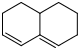

s2_6_6_diene_0_8
1  * Cs u0 {4,S} {6,S} {10,S}
2    Cs u0 {5,S} {6,S}
3    Cd u0 {8,S} {9,D}
4    Cd u0 {1,S} {7,D} {9,S}
5    Cs u0 {2,S} {7,S}
6    Cs u0 {1,S} {2,S}
7    Cd u0 {4,D} {5,S}
8    Cs u0 {3,S} {10,S}
9    Cd u0 {3,D} {4,S}
10   Cs u0 {1,S} {8,S}

**********************


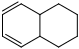

s2_6_6_diene_1_3
1  * Cs u0 {3,S} {9,S}
2    Cd u0 {5,S} {6,D}
3    Cs u0 {1,S} {4,S}
4    Cs u0 {3,S} {8,S}
5    Cd u0 {2,S} {10,D}
6    Cd u0 {2,D} {8,S}
7    Cs u0 {8,S} {9,S} {10,S}
8    Cs u0 {4,S} {6,S} {7,S}
9    Cs u0 {1,S} {7,S}
10   Cd u0 {5,D} {7,S}

**********************


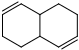

s2_6_6_diene_1_6
1  * Cd u0 {5,S} {6,D}
2    Cs u0 {3,S} {5,S}
3    Cs u0 {2,S} {4,S}
4    Cd u0 {3,S} {7,D}
5    Cs u0 {1,S} {2,S} {8,S}
6    Cd u0 {1,D} {9,S}
7    Cd u0 {4,D} {8,S}
8    Cs u0 {5,S} {7,S} {10,S}
9    Cs u0 {6,S} {10,S}
10   Cs u0 {8,S} {9,S}

**********************


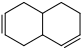

s2_6_6_diene_1_7
1  * Cd u0 {4,D} {10,S}
2    Cd u0 {7,D} {8,S}
3    Cs u0 {5,S} {6,S} {9,S}
4    Cd u0 {1,D} {9,S}
5    Cs u0 {3,S} {8,S}
6    Cs u0 {3,S} {7,S} {10,S}
7    Cd u0 {2,D} {6,S}
8    Cs u0 {2,S} {5,S}
9    Cs u0 {3,S} {4,S}
10   Cs u0 {1,S} {6,S}

**********************


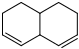

s2_6_6_diene_1_8
1  * Cd u0 {2,S} {7,D}
2    Cs u0 {1,S} {4,S} {10,S}
3    Cs u0 {4,S} {8,S}
4    Cs u0 {2,S} {3,S} {6,S}
5    Cd u0 {8,S} {10,D}
6    Cs u0 {4,S} {9,S}
7    Cd u0 {1,D} {9,S}
8    Cs u0 {3,S} {5,S}
9    Cs u0 {6,S} {7,S}
10   Cd u0 {2,S} {5,D}

**********************


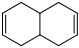

s2_6_6_diene_2_7
1  * Cd u0 {4,D} {5,S}
2    Cs u0 {3,S} {9,S}
3    Cd u0 {2,S} {10,D}
4    Cd u0 {1,D} {8,S}
5    Cs u0 {1,S} {9,S}
6    Cs u0 {7,S} {8,S} {9,S}
7    Cs u0 {6,S} {10,S}
8    Cs u0 {4,S} {6,S}
9    Cs u0 {2,S} {5,S} {6,S}
10   Cd u0 {3,D} {7,S}

**********************


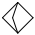

s3_4_4_ane
1 * Cs u0 {2,S} {3,S}
2   Cs u0 {1,S} {4,S} {5,S}
3   Cs u0 {1,S} {4,S} {5,S}
4   Cs u0 {2,S} {3,S}
5   Cs u0 {2,S} {3,S}

**********************


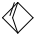

s3_4_4_ene_0
1 * Cd u0 {2,S} {3,S} {5,D}
2   Cs u0 {1,S} {4,S}
3   Cs u0 {1,S} {4,S}
4   Cs u0 {2,S} {3,S} {5,S}
5   Cd u0 {1,D} {4,S}

**********************


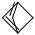

s3_4_4_diene_0_2
1 * Cd u0 {2,S} {3,S} {5,D}
2   Cs u0 {1,S} {4,S}
3   Cd u0 {1,S} {4,D}
4   Cd u0 {2,S} {3,D} {5,S}
5   Cd u0 {1,D} {4,S}

**********************


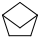

s3_4_5_ane
1 * Cs u0 {2,S} {3,S}
2   Cs u0 {1,S} {6,S}
3   Cs u0 {1,S} {4,S} {5,S}
4   Cs u0 {3,S} {6,S}
5   Cs u0 {3,S} {6,S}
6   Cs u0 {2,S} {4,S} {5,S}

**********************


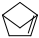

s3_4_5_ene_0
1 * Cs u0 {3,S} {4,S}
2   Cs u0 {3,S} {5,S}
3   Cs u0 {1,S} {2,S} {6,S}
4   Cd u0 {1,S} {5,D}
5   Cd u0 {2,S} {4,D} {6,S}
6   Cs u0 {3,S} {5,S}

**********************


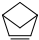

s3_4_5_ene_1
1 * Cd u0 {3,D} {4,S}
2   Cs u0 {4,S} {5,S}
3   Cd u0 {1,D} {5,S}
4   Cs u0 {1,S} {2,S} {6,S}
5   Cs u0 {2,S} {3,S} {6,S}
6   Cs u0 {4,S} {5,S}

**********************


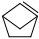

s3_4_5_ene_3
1 * Cd u0 {2,D} {4,S} {5,S}
2   Cd u0 {1,D} {3,S}
3   Cs u0 {2,S} {5,S} {6,S}
4   Cs u0 {1,S} {6,S}
5   Cs u0 {1,S} {3,S}
6   Cs u0 {3,S} {4,S}

**********************


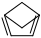

s3_4_5_diene_0_2
1 * Cs u0 {3,S} {6,S}
2   Cs u0 {3,S} {6,S}
3   Cd u0 {1,S} {2,S} {5,D}
4   Cd u0 {5,S} {6,D}
5   Cd u0 {3,D} {4,S}
6   Cd u0 {1,S} {2,S} {4,D}

**********************


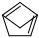

s3_4_5_diene_0_3
1 * Cs u0 {2,S} {3,S}
2   Cd u0 {1,S} {4,S} {5,D}
3   Cd u0 {1,S} {5,S} {6,D}
4   Cs u0 {2,S} {6,S}
5   Cd u0 {2,D} {3,S}
6   Cd u0 {3,D} {4,S}

**********************


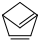

s3_4_5_diene_1_3
1 * Cd u0 {3,S} {4,D}
2   Cd u0 {4,S} {6,D}
3   Cs u0 {1,S} {5,S} {6,S}
4   Cd u0 {1,D} {2,S} {5,S}
5   Cs u0 {3,S} {4,S}
6   Cd u0 {2,D} {3,S}

**********************


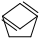

s3_4_5_diene_3_4
1 * Cd u0 {3,S} {6,D}
2   Cs u0 {5,S} {6,S}
3   Cd u0 {1,S} {4,D} {5,S}
4   Cd u0 {3,D} {6,S}
5   Cs u0 {2,S} {3,S}
6   Cd u0 {1,D} {2,S} {4,S}

**********************


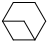

s3_4_6_ane
1 * Cs u0 {3,S} {7,S}
2   Cs u0 {4,S} {5,S} {6,S}
3   Cs u0 {1,S} {6,S}
4   Cs u0 {2,S} {7,S}
5   Cs u0 {2,S} {7,S}
6   Cs u0 {2,S} {3,S}
7   Cs u0 {1,S} {4,S} {5,S}

**********************


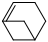

s3_4_6_ene_0
1 * Cd u0 {2,S} {4,D} {5,S}
2   Cs u0 {1,S} {7,S}
3   Cs u0 {6,S} {7,S}
4   Cd u0 {1,D} {6,S}
5   Cs u0 {1,S} {7,S}
6   Cs u0 {3,S} {4,S}
7   Cs u0 {2,S} {3,S} {5,S}

**********************


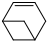

s3_4_6_ene_1
1 * Cd u0 {4,S} {7,D}
2   Cs u0 {3,S} {6,S}
3   Cs u0 {2,S} {4,S} {5,S}
4   Cs u0 {1,S} {3,S}
5   Cs u0 {3,S} {6,S}
6   Cs u0 {2,S} {5,S} {7,S}
7   Cd u0 {1,D} {6,S}

**********************


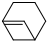

s3_4_6_ene_4
1 * Cs u0 {2,S} {5,S}
2   Cs u0 {1,S} {6,S}
3   Cd u0 {4,S} {6,S} {7,D}
4   Cs u0 {3,S} {5,S}
5   Cs u0 {1,S} {4,S} {7,S}
6   Cs u0 {2,S} {3,S}
7   Cd u0 {3,D} {5,S}

**********************


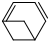

s3_4_6_diene_0_2
1 * Cs u0 {4,S} {5,S} {7,S}
2   Cd u0 {3,D} {5,S} {7,S}
3   Cd u0 {2,D} {6,S}
4   Cd u0 {1,S} {6,D}
5   Cs u0 {1,S} {2,S}
6   Cd u0 {3,S} {4,D}
7   Cs u0 {1,S} {2,S}

**********************


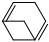

s3_4_6_diene_0_3
1 * Cd u0 {3,S} {5,D} {6,S}
2   Cd u0 {3,S} {6,S} {7,D}
3   Cs u0 {1,S} {2,S}
4   Cs u0 {5,S} {7,S}
5   Cd u0 {1,D} {4,S}
6   Cs u0 {1,S} {2,S}
7   Cd u0 {2,D} {4,S}

**********************


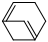

s3_4_6_diene_0_4
1 * Cd u0 {4,S} {7,D}
2   Cs u0 {3,S} {6,S}
3   Cd u0 {2,S} {4,D}
4   Cd u0 {1,S} {3,D} {5,S}
5   Cs u0 {4,S} {7,S}
6   Cs u0 {2,S} {7,S}
7   Cd u0 {1,D} {5,S} {6,S}

**********************


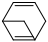

s3_4_6_diene_1_4
1 * Cd u0 {2,D} {6,S}
2   Cd u0 {1,D} {7,S}
3   Cd u0 {4,S} {5,D} {6,S}
4   Cs u0 {3,S} {7,S}
5   Cd u0 {3,D} {7,S}
6   Cs u0 {1,S} {3,S}
7   Cs u0 {2,S} {4,S} {5,S}

**********************


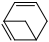

s3_4_6_diene_1_5
1 * Cs u0 {2,S} {7,S}
2   Cd u0 {1,S} {3,D}
3   Cd u0 {2,D} {6,S}
4   Cs u0 {6,S} {7,S}
5   Cd u0 {6,D} {7,S}
6   Cd u0 {3,S} {4,S} {5,D}
7   Cs u0 {1,S} {4,S} {5,S}

**********************


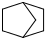

s3_5_5_ane
1 * Cs u0 {5,S} {6,S}
2   Cs u0 {6,S} {7,S}
3   Cs u0 {4,S} {6,S}
4   Cs u0 {3,S} {5,S}
5   Cs u0 {1,S} {4,S} {7,S}
6   Cs u0 {1,S} {2,S} {3,S}
7   Cs u0 {2,S} {5,S}

**********************


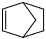

s3_5_5_ene_1
1 * Cd u0 {2,S} {3,D}
2   Cs u0 {1,S} {4,S} {5,S}
3   Cd u0 {1,D} {6,S}
4   Cs u0 {2,S} {6,S}
5   Cs u0 {2,S} {7,S}
6   Cs u0 {3,S} {4,S} {7,S}
7   Cs u0 {5,S} {6,S}

**********************


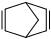

s3_5_5_diene_1_4
1 * Cs u0 {5,S} {6,S} {7,S}
2   Cd u0 {3,S} {6,D}
3   Cs u0 {2,S} {4,S} {5,S}
4   Cd u0 {3,S} {7,D}
5   Cs u0 {1,S} {3,S}
6   Cd u0 {1,S} {2,D}
7   Cd u0 {1,S} {4,D}

**********************


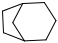

s3_5_6_ane
1 * Cs u0 {4,S} {5,S} {6,S}
2   Cs u0 {7,S} {8,S}
3   Cs u0 {5,S} {8,S}
4   Cs u0 {1,S} {8,S}
5   Cs u0 {1,S} {3,S}
6   Cs u0 {1,S} {7,S}
7   Cs u0 {2,S} {6,S}
8   Cs u0 {2,S} {3,S} {4,S}

**********************


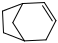

s3_5_6_ene_1
1 * Cs u0 {3,S} {4,S}
2   Cd u0 {4,S} {7,D}
3   Cs u0 {1,S} {5,S}
4   Cs u0 {1,S} {2,S} {8,S}
5   Cs u0 {3,S} {6,S} {8,S}
6   Cs u0 {5,S} {7,S}
7   Cd u0 {2,D} {6,S}
8   Cs u0 {4,S} {5,S}

**********************


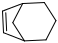

s3_5_6_ene_5
1 * Cs u0 {2,S} {6,S} {7,S}
2   Cs u0 {1,S} {4,S}
3   Cd u0 {4,S} {7,D}
4   Cs u0 {2,S} {3,S} {5,S}
5   Cs u0 {4,S} {8,S}
6   Cs u0 {1,S} {8,S}
7   Cd u0 {1,S} {3,D}
8   Cs u0 {5,S} {6,S}

**********************


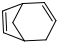

s3_5_6_diene_1_5
1 * Cs u0 {5,S} {7,S}
2   Cs u0 {5,S} {8,S}
3   Cd u0 {7,D} {8,S}
4   Cd u0 {5,S} {6,D}
5   Cs u0 {1,S} {2,S} {4,S}
6   Cd u0 {4,D} {8,S}
7   Cd u0 {1,S} {3,D}
8   Cs u0 {2,S} {3,S} {6,S}

**********************


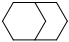

s3_6_6_ane
1 * Cs u0 {2,S} {6,S}
2   Cs u0 {1,S} {4,S} {5,S}
3   Cs u0 {5,S} {9,S}
4   Cs u0 {2,S} {8,S}
5   Cs u0 {2,S} {3,S}
6   Cs u0 {1,S} {7,S}
7   Cs u0 {6,S} {8,S}
8   Cs u0 {4,S} {7,S} {9,S}
9   Cs u0 {3,S} {8,S}

**********************


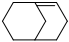

s3_6_6_ene_0
1 * Cd u0 {5,S} {7,D}
2   Cs u0 {4,S} {5,S}
3   Cs u0 {4,S} {9,S}
4   Cs u0 {2,S} {3,S} {6,S}
5   Cs u0 {1,S} {2,S}
6   Cs u0 {4,S} {7,S}
7   Cd u0 {1,D} {6,S} {8,S}
8   Cs u0 {7,S} {9,S}
9   Cs u0 {3,S} {8,S}

**********************


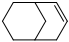

s3_6_6_ene_1
1 * Cd u0 {3,S} {8,D}
2   Cs u0 {4,S} {9,S}
3   Cs u0 {1,S} {5,S} {6,S}
4   Cs u0 {2,S} {6,S} {7,S}
5   Cs u0 {3,S} {9,S}
6   Cs u0 {3,S} {4,S}
7   Cs u0 {4,S} {8,S}
8   Cd u0 {1,D} {7,S}
9   Cs u0 {2,S} {5,S}

**********************


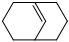

s3_6_6_ene_4
1 * Cs u0 {4,S} {7,S}
2   Cd u0 {5,D} {7,S}
3   Cs u0 {8,S} {9,S}
4   Cs u0 {1,S} {6,S}
5   Cd u0 {2,D} {6,S} {8,S}
6   Cs u0 {4,S} {5,S}
7   Cs u0 {1,S} {2,S} {9,S}
8   Cs u0 {3,S} {5,S}
9   Cs u0 {3,S} {7,S}

**********************


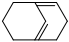

s3_6_6_diene_0_m
1 * Cd u0 {7,D} {8,S}
2   Cs u0 {5,S} {6,S}
3   Cd u0 {4,S} {5,S} {9,D}
4   Cs u0 {3,S} {8,S}
5   Cs u0 {2,S} {3,S}
6   Cs u0 {2,S} {7,S}
7   Cd u0 {1,D} {6,S} {9,S}
8   Cs u0 {1,S} {4,S}
9   Cd u0 {3,D} {7,S}

**********************


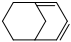

s3_6_6_diene_0_2
1 * Cd u0 {5,D} {8,S}
2   Cs u0 {4,S} {6,S}
3   Cs u0 {4,S} {8,S}
4   Cd u0 {2,S} {3,S} {7,D}
5   Cd u0 {1,D} {7,S}
6   Cs u0 {2,S} {9,S}
7   Cd u0 {4,D} {5,S}
8   Cs u0 {1,S} {3,S} {9,S}
9   Cs u0 {6,S} {8,S}

**********************


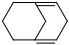

s3_6_6_diene_0_3
1 * Cs u0 {3,S} {5,S}
2   Cd u0 {5,S} {6,S} {7,D}
3   Cs u0 {1,S} {4,S}
4   Cd u0 {3,S} {6,S} {9,D}
5   Cs u0 {1,S} {2,S}
6   Cs u0 {2,S} {4,S}
7   Cd u0 {2,D} {8,S}
8   Cs u0 {7,S} {9,S}
9   Cd u0 {4,D} {8,S}

**********************


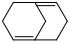

s3_6_6_diene_0_4
1 * Cd u0 {6,D} {8,S}
2   Cs u0 {3,S} {6,S}
3   Cd u0 {2,S} {4,D} {7,S}
4   Cd u0 {3,D} {9,S}
5   Cs u0 {6,S} {9,S}
6   Cd u0 {1,D} {2,S} {5,S}
7   Cs u0 {3,S} {8,S}
8   Cs u0 {1,S} {7,S}
9   Cs u0 {4,S} {5,S}

**********************


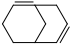

s3_6_6_diene_0_5
1 * Cs u0 {3,S} {4,S} {8,S}
2   Cd u0 {4,D} {7,S}
3   Cs u0 {1,S} {6,S}
4   Cd u0 {1,S} {2,D}
5   Cs u0 {8,S} {9,S}
6   Cd u0 {3,S} {7,S} {9,D}
7   Cs u0 {2,S} {6,S}
8   Cs u0 {1,S} {5,S}
9   Cd u0 {5,S} {6,D}

**********************


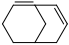

s3_6_6_diene_0_6
1 * Cd u0 {7,D} {8,S}
2   Cs u0 {3,S} {9,S}
3   Cs u0 {2,S} {5,S}
4   Cs u0 {7,S} {9,S}
5   Cd u0 {3,S} {8,D}
6   Cs u0 {8,S} {9,S}
7   Cd u0 {1,D} {4,S}
8   Cd u0 {1,S} {5,D} {6,S}
9   Cs u0 {2,S} {4,S} {6,S}

**********************


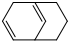

s3_6_6_diene_1_m
1 * Cs u0 {7,S} {8,S}
2   Cd u0 {5,S} {7,D}
3   Cs u0 {4,S} {9,S}
4   Cs u0 {3,S} {5,S}
5   Cs u0 {2,S} {4,S} {6,S}
6   Cd u0 {5,S} {8,D}
7   Cd u0 {1,S} {2,D}
8   Cd u0 {1,S} {6,D} {9,S}
9   Cs u0 {3,S} {8,S}

**********************


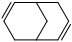

s3_6_6_diene_1_5
1 * Cs u0 {2,S} {5,S} {9,S}
2   Cs u0 {1,S} {4,S}
3   Cd u0 {7,D} {9,S}
4   Cs u0 {2,S} {7,S} {8,S}
5   Cd u0 {1,S} {6,D}
6   Cd u0 {5,D} {8,S}
7   Cd u0 {3,D} {4,S}
8   Cs u0 {4,S} {6,S}
9   Cs u0 {1,S} {3,S}

**********************


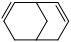

s3_6_6_diene_1_6
1 * Cs u0 {5,S} {6,S} {8,S}
2   Cd u0 {3,S} {9,D}
3   Cs u0 {2,S} {4,S} {6,S}
4   Cd u0 {3,S} {7,D}
5   Cs u0 {1,S} {7,S}
6   Cs u0 {1,S} {3,S}
7   Cd u0 {4,D} {5,S}
8   Cs u0 {1,S} {9,S}
9   Cd u0 {2,D} {8,S}

**********************


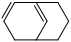

s3_6_6_diene_1_8
1 * Cs u0 {2,S} {7,S}
2   Cs u0 {1,S} {5,S}
3   Cd u0 {5,S} {6,D}
4   Cd u0 {5,D} {9,S}
5   Cd u0 {2,S} {3,S} {4,D}
6   Cd u0 {3,D} {8,S}
7   Cs u0 {1,S} {9,S}
8   Cs u0 {6,S} {9,S}
9   Cs u0 {4,S} {7,S} {8,S}

**********************


In [5]:
for spec in rmg.initialSpecies:
    display(spec)
    print spec.label
    polycyclic_group = extractPolycyclicGroups(spec.molecule[0])
    assert len(polycyclic_group) == 1
    print polycyclic_group[0].toAdjacencyList()
    print '**********************'

In [6]:
from rmgpy.data.rmg import RMGDatabase
from rmgpy import settings

database = RMGDatabase()
database.load(settings['database.directory'], thermoLibraries = 'none', kineticsFamilies='none', kineticsDepositories='none', reactionLibraries=[])

thermoDatabase = database.thermo


import copy
thermoDatabase0 = copy.deepcopy(database.thermo)

In [7]:
from rmgpy.data.base import Entry
polycyclicRingGroup = thermoDatabase.groups['polycyclic'].entries['PolycyclicRing']
dummy_thermo_data = polycyclicRingGroup.data
for spec in rmg.initialSpecies:
    matched_groups = extractPolycyclicGroups(spec.molecule[0])
    thermoDatabase.groups['polycyclic'].entries[spec.label] = Entry(index = len(thermoDatabase.groups['polycyclic'].entries)+1,
                                                                                  label = spec.label,
                                                                                   item = matched_groups[0],
                                                                                   data = dummy_thermo_data, # Use dummy thermo here so other estimates can find this group
                                                                                   parent = polycyclicRingGroup,
                                                                                  )
    polycyclicGroup = thermoDatabase.groups['polycyclic'].entries[spec.label] 
    thermoDatabase.groups['polycyclic'].entries['PolycyclicRing'].children.append(polycyclicGroup)

In [8]:
thermoDatabase.groups['polycyclic'].save('new_polycyclic.py')